In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the Boston housing dataset
boston = pd.read_csv('HousingData.csv')


In [3]:
# Shape of the dataset
print("Shape of the dataset:")
print(boston.shape)

print("First few rows of the dataset:")
print(boston.head())

print("Summary statistics of the dataset:")
print(boston.describe())

print("Information about the dataset:")
print(boston.info())

print("Missing values in the dataset:")
print(boston.isnull().sum())

print("Correlation matrix of the dataset:")
print(boston.corr())


Shape of the dataset:
(506, 14)
First few rows of the dataset:
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
Summary statistics of the dataset:
             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.32245

In [4]:
boston = boston.dropna()  # Drop rows with missing values

In [5]:
x = boston.drop('MEDV', axis=1)  # Features
y = boston['MEDV']  # Target variable

In [6]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [7]:
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (404, 13)
x_test shape: (102, 13)
y_train shape: (404,)
y_test shape: (102,)


Mean Squared Error: 24.291119474973534
R^2 Score: 0.6687594935356318


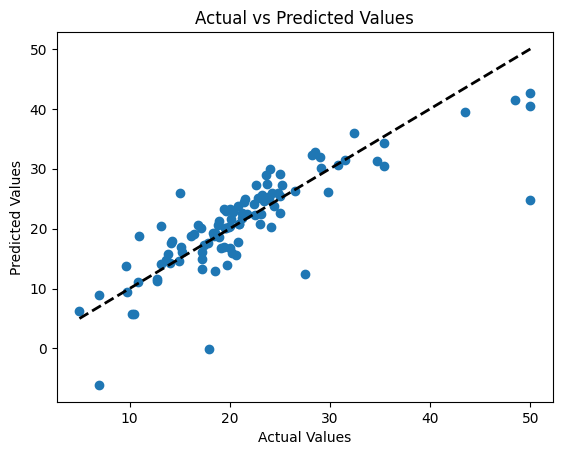

In [8]:
# Simple LR

from sklearn.linear_model import LinearRegression
# Create a linear regression model
model = LinearRegression()
# Fit the model to the training data
model.fit(x_train, y_train) 

# Make predictions on the test data
y_pred = model.predict(x_test)

# Calculate the mean squared error
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Plotting the predictions vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")

plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.axis("tight")
plt.show()



Iteration 1, loss = 308.60059227
Iteration 2, loss = 307.56162930
Iteration 3, loss = 306.54770602
Iteration 4, loss = 305.53487955
Iteration 5, loss = 304.53548672
Iteration 6, loss = 303.55228794
Iteration 7, loss = 302.54133551
Iteration 8, loss = 301.53726531
Iteration 9, loss = 300.54584060
Iteration 10, loss = 299.59677976
Iteration 11, loss = 298.68741331
Iteration 12, loss = 297.78556245
Iteration 13, loss = 296.87405056
Iteration 14, loss = 295.99230032
Iteration 15, loss = 295.13095310
Iteration 16, loss = 294.29298240
Iteration 17, loss = 293.48296270
Iteration 18, loss = 292.63899053
Iteration 19, loss = 291.77557696
Iteration 20, loss = 290.87316911
Iteration 21, loss = 289.97848640
Iteration 22, loss = 289.12882301
Iteration 23, loss = 288.26330267
Iteration 24, loss = 287.41324010
Iteration 25, loss = 286.55996854
Iteration 26, loss = 285.72317201
Iteration 27, loss = 284.90711504
Iteration 28, loss = 284.08059684
Iteration 29, loss = 283.26008147
Iteration 30, loss = 28

c:\Users\Shubham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


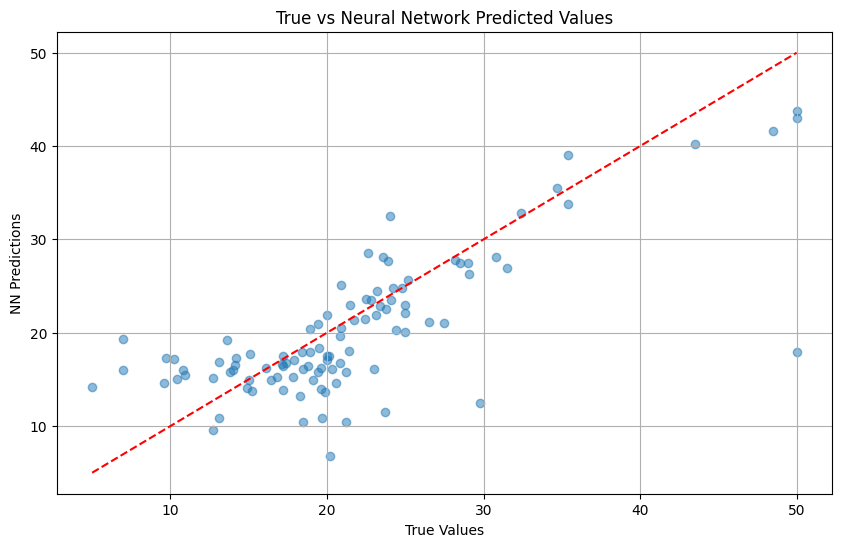

In [9]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

# Scale the features (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# Create a simple neural network with just one hidden layer
nn_model = MLPRegressor(
    hidden_layer_sizes=(10,),  # One hidden layer with 10 neurons
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42,
    verbose=True
)

# Train the model
nn_model.fit(X_train_scaled, y_train)

# Make predictions
nn_predictions = nn_model.predict(X_test_scaled)

# Evaluate the model
nn_mse = mean_squared_error(y_test, nn_predictions)
nn_r2 = r2_score(y_test, nn_predictions)
print("Neural Network Mean Squared Error:", nn_mse)
print("Neural Network R-squared Score:", nn_r2)

# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, nn_predictions, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('NN Predictions')
plt.title('True vs Neural Network Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.grid(True)
plt.show()

In [10]:
# Feature Selection based on correlation analysis

# 1. Find highly correlated features (multicollinearity)
correlation_matrix = boston.corr().abs()
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
high_corr_pairs = [(correlation_matrix.columns[i], correlation_matrix.columns[j]) 
                  for i, j in zip(*np.where(upper_tri > 0.7))]

print("Highly correlated feature pairs (correlation > 0.7):")
for pair in high_corr_pairs:
    print(f"{pair[0]} and {pair[1]}: {correlation_matrix.loc[pair[0], pair[1]]:.3f}")

# 2. Feature importance using a simple Random Forest
from sklearn.ensemble import RandomForestRegressor

# We'll use all features including the log-transformed ones
X = boston.drop('MEDV', axis=1)  # Features
y = boston['MEDV']  # Target variable

# Train a Random Forest model to get feature importances
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
})

# Sort by importance
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))


# Select top features (optional)
top_features = feature_importance['Feature'].head(10).tolist()
print("\nTop 10 most important features:")
print(top_features)

# You can choose to use only the top features
# Uncomment the line below to use only top features
# X = boston[top_features]

Highly correlated feature pairs (correlation > 0.7):
indus and nox: 0.764
indus and dis: 0.708
indus and tax: 0.721
nox and age: 0.731
nox and dis: 0.769
age and dis: 0.748
rad and tax: 0.910
lstat and MEDV: 0.738

Top 10 most important features:
['lstat', 'rm', 'dis', 'crim', 'nox', 'ptratio', 'tax', 'age', 'b', 'indus']


<Figure size 1200x800 with 0 Axes>